# Standard Deviation

The Standard Deviation (STDEV) is a basic measure of price volatility that is used in combination with  
a lot of other technical analysis indicators to improve them.

Standard Deviation is a standard measure that is computed by measuring the squared deviation of individual  
prices from the mean price, and them finding the average of all those squared diviation values.  
This value is known as **variance**, and the standard deviation is obtained by taking the square root  
of the variance. Larger SDTEVs are a mark of more volatile markets or larger expected price moves,  
so trading stragegies need to factor that increased volatility into risk estimates and other trading behaviore. 

To compute standard deviation, first we compute the variance:  
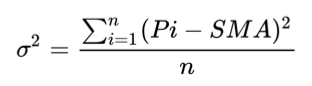


Then, standard deviation is simply the square root of the variance:  
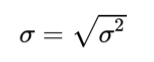

SMA: Simple moving average over n time periods.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import statistics as stats
import math as math

In [3]:
df = pd.read_csv('data/ETHUSDT.csv')
close = df['Close']
close

0      4295.39
1      4294.73
2      4284.49
3      4278.19
4      4296.08
        ...   
495    4073.23
496    4070.07
497    4101.49
498    4107.71
499    4103.48
Name: Close, Length: 500, dtype: float64

In [5]:
# look back period
time_period = 20

# history of price
history = []

# sma values
sma_values = []

# history of computed stdev values
stddev_values = []

for close_price in close:
    history.append(close_price)
    if len(history) > time_period:
        del(history[0])
        
    sma = stats.mean(history)
    sma_values.append(sma)
    
    # variance is square root of standad deviation
    variance = 0
    for hist_price in history:
        variance = variance + ((hist_price - sma) ** 2)
    
    stdev = math.sqrt(variance / len(history))
    stddev_values.append(stdev)
    

In [6]:
df_data = df.assign(ClosePrice=pd.Series(close, index=df.index))
df_data = df_data.assign(StandardDeviationOver20TimePeriod=pd.Series(stddev_values, index=df.index))

close_price = df_data['ClosePrice']
stddev = df_data['StandardDeviationOver20TimePeriod']

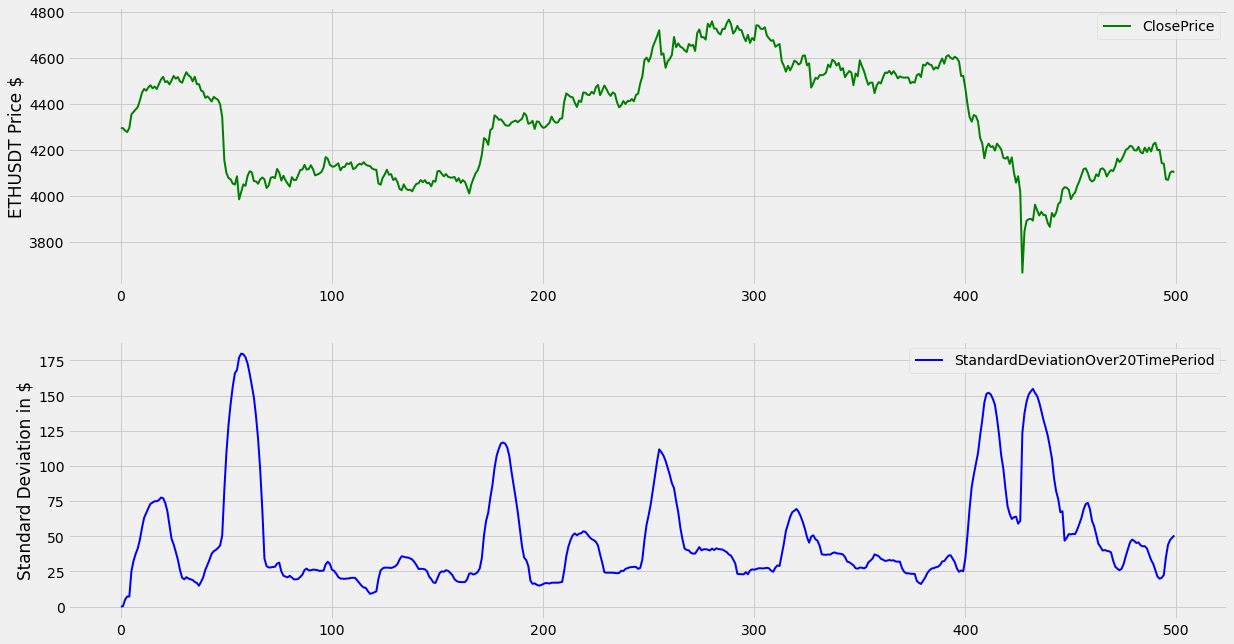

In [9]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)

ax1 = fig.add_subplot(211, ylabel='ETHUSDT Price $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)

ax2 = fig.add_subplot(212, ylabel='Standard Deviation in $')
stddev.plot(ax=ax2, color='b', lw=2., legend=True)

plt.show()